▶🖌️ Welcome to ArTailor

1) make sure you run the library installation at the top

2) you can upload an image via URL, or upload from your local drive
  - URLs for testing images are provided

3) provided features:
  - pose estimation via OpenPose
  - line art estimation via LineArt
  - line segment/perspective estimation via MLSD
  
*as of now, the image may fail to load- this is likely due to the uploaded file size or browser issues

Install library:

In [ ]:
!pip install -U controlnet-aux

Run OpenPose for pose skeleton (ideal for identifying the pose of a person):

test image URL: https://hips.hearstapps.com/hmg-prod/images/gettyimages-97087500-1538405224.jpg

How would you like to upload your image? Input 1 for URL and 2 for local drive: 1
Enter the link for your image: https://hips.hearstapps.com/hmg-prod/images/gettyimages-97087500-1538405224.jpg


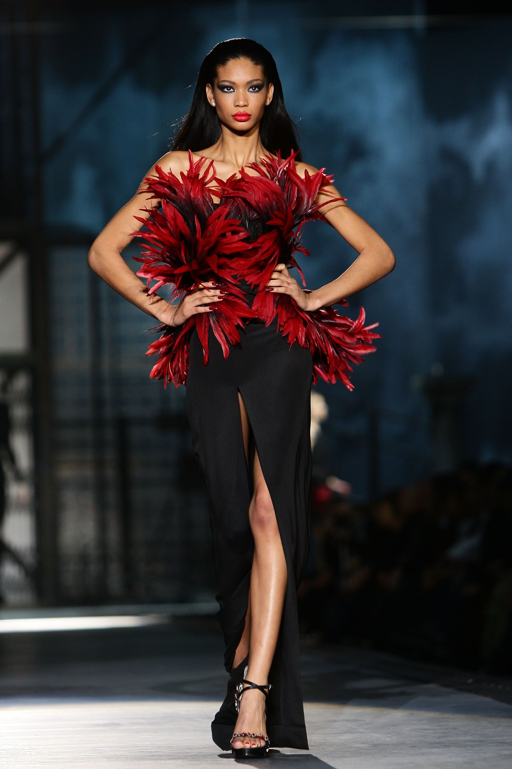

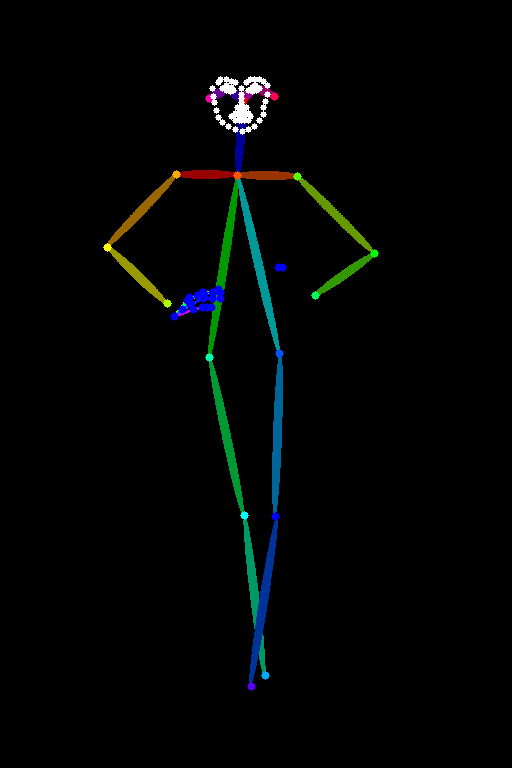

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
from controlnet_aux import OpenposeDetector
from google.colab import files
import os

# upload image from local drive
def load_image_from_local():
    try:
        uploaded = files.upload()
        for filename in uploaded.keys():
            img = Image.open(filename).convert("RGB")
            return img
    except Exception as e:
        print(f"Error loading image from local: {e}")
        return None

# upload image from URL
def load_image_from_url(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except Exception as e:
        print(f"Error loading image from URL: {e}")
        return None

# ask user how they would like to upload images
pick = input("How would you like to upload your image? Input 1 for URL and 2 for local drive: ")

# call function to upload image depending on user input
if pick == "1":
    url = input("Enter the link for your image: ")
    img = load_image_from_url(url)
elif pick == "2":
    img = load_image_from_local()
else:
    print("Invalid input. Please choose 1 or 2.")
    img = None

# resize, process, and display image
if img is not None:
    original_width, original_height = img.size
    new_width = 512
    new_height = int((new_width / original_width) * original_height)
    img = img.resize((new_width, new_height))

    open_pose = OpenposeDetector.from_pretrained("lllyasviel/Annotators")

    processed_image_open_pose = open_pose(img, hand_and_face=True)

    original_width, original_height = processed_image_open_pose.size
    new_width = 512
    new_height = int((new_width / original_width) * original_height)
    processed_image_open_pose = processed_image_open_pose.resize((new_width, new_height))

    imgs = [img, processed_image_open_pose]
    display(*imgs)
else:
    print("No image was loaded.")

Run LineArt for lineart:

test image URL: https://www.cdc.gov/healthy-pets/media/images/2024/04/Cat-on-couch.jpg

How would you like to upload your image? Input 1 for URL and 2 for local drive: 1
Enter the link for your image: https://www.cdc.gov/healthy-pets/media/images/2024/04/Cat-on-couch.jpg


sk_model.pth:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

sk_model2.pth:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/controlnet_aux/lineart/__init__.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, ma

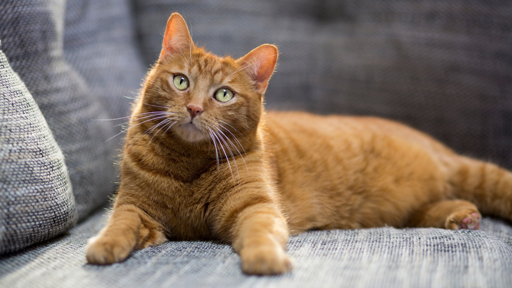

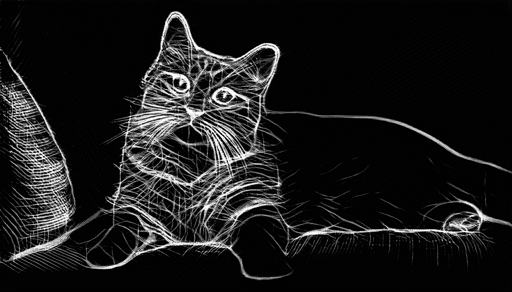

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
from controlnet_aux import LineartDetector
from google.colab import files
import os

# upload image from local drive
def load_image_from_local():
    try:
        uploaded = files.upload()
        for filename in uploaded.keys():
            img = Image.open(filename).convert("RGB")
            return img
    except Exception as e:
        print(f"Error loading image from local: {e}")
        return None

# upload image from URL
def load_image_from_url(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except Exception as e:
        print(f"Error loading image from URL: {e}")
        return None

# ask user how they would like to upload images
pick = input("How would you like to upload your image? Input 1 for URL and 2 for local drive: ")

# call function to upload image depending on user input
if pick == "1":
    url = input("Enter the link for your image: ")
    img = load_image_from_url(url)
elif pick == "2":
    img = load_image_from_local()
else:
    print("Invalid input. Please choose 1 or 2.")
    img = None

# resize, process, and display image
if img is not None:
    original_width, original_height = img.size
    new_width = 512
    new_height = int((new_width / original_width) * original_height)
    img = img.resize((new_width, new_height))

    lineart = LineartDetector.from_pretrained("lllyasviel/Annotators")

    processed_image_lineart = lineart(img, coarse=True)

    original_width, original_height = processed_image_lineart.size
    new_width = 512
    new_height = int((new_width / original_width) * original_height)
    processed_image_lineart = processed_image_lineart.resize((new_width, new_height))

    imgs = [img, processed_image_lineart]
    display(*imgs)
else:
    print("No image was loaded.")

Run MLSD for line segment detection (ideal for identifying perspectives of backdrops):

test image URL: https://images.unsplash.com/photo-1616474655260-de945dff1b31?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8YnVpbGRpbmclMjBwZXJzcGVjdGl2ZXxlbnwwfHwwfHx8MA%3D%3D

How would you like to upload your image? Input 1 for URL and 2 for local drive: 1
Enter the link for your image: https://images.unsplash.com/photo-1616474655260-de945dff1b31?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8YnVpbGRpbmclMjBwZXJzcGVjdGl2ZXxlbnwwfHwwfHx8MA%3D%3D


/usr/local/lib/python3.10/dist-packages/controlnet_aux/mlsd/__init__.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path), stric

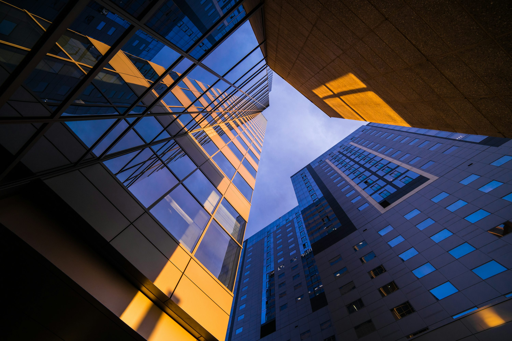

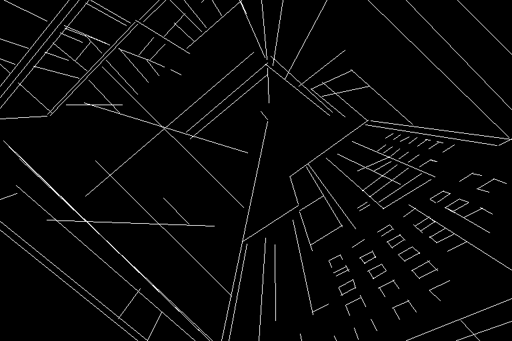

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
from controlnet_aux import MLSDdetector
from google.colab import files
import os

# upload image from local drive
def load_image_from_local():
    try:
        uploaded = files.upload()
        for filename in uploaded.keys():
            img = Image.open(filename).convert("RGB")
            return img
    except Exception as e:
        print(f"Error loading image from local: {e}")
        return None

# upload image from URL
def load_image_from_url(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except Exception as e:
        print(f"Error loading image from URL: {e}")
        return None

# ask user how they would like to upload images
pick = input("How would you like to upload your image? Input 1 for URL and 2 for local drive: ")

# call function to upload image depending on user input
if pick == "1":
    url = input("Enter the link for your image: ")
    img = load_image_from_url(url)
elif pick == "2":
    img = load_image_from_local()
else:
    print("Invalid input. Please choose 1 or 2.")
    img = None

# resize, process, and display image
if img is not None:
    original_width, original_height = img.size
    new_width = 512
    new_height = int((new_width / original_width) * original_height)
    img = img.resize((new_width, new_height))

    mlsd = MLSDdetector.from_pretrained("lllyasviel/Annotators")

    processed_image_mlsd = mlsd(img)

    original_width, original_height = processed_image_mlsd.size
    new_width = 512
    new_height = int((new_width / original_width) * original_height)
    processed_image_mlsd = processed_image_mlsd.resize((new_width, new_height))

    imgs = [img, processed_image_mlsd]
    display(*imgs)
else:
    print("No image was loaded.")